### <font color=darkred> <b> Análise Estatística Para Data Science com Linguagem Python </b> </font>

### <font color=darkblue> <b> Modelagem Estatística de Séries Temporais </b> </font>

### <font color=darkgreen> <b> Lab 2 - Parte 1 - Modelagem Preditiva - Forecasting </b> </font>

#### <font color=darkblue> <b> Método Naive / Simple e Double Exponencial Smoothing</b> </font>


### <font color=darkred> <b> Instalando e Carregando Pacotes </b> </font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure

# Imports para modelagem preditiva - Para 2 tecnica - exponencialsmoothing
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para métricas e performance do modelo
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Filtrando warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

sklearn    : 1.0.2
pandas     : 1.5.3
numpy      : 1.23.5
statsmodels: 0.13.2
matplotlib : 3.7.1



#### <font color=darkgreen> Informações Iniciais: </font>
- Este Lab é continuação do Lab1, onde trabalhamos as hipoteses necessárias para trabalharmos com Análise Estatística
- Aqui os dados já estão estacionários, mas a quantidade foi aumentada, pois precisamos de dados de treino e teste.  

### <font color=darkred> <b> Carregando e Compreendendo Dados</b> </font>

In [5]:
# Carrega os dados
dados_treino = pd.read_csv("dados/dataset_treino.csv")
dados_teste = pd.read_csv("dados/dataset_teste.csv")

#### Dados de Treino

In [6]:
# Shape
dados_treino.shape

(18288, 3)

In [7]:
# Primeiros registros
dados_treino.head()

,id,data,veiculos_produzidos
0,0,25-08-2020 00:00,8
1,1,25-08-2020 01:00,2
2,2,25-08-2020 02:00,6
3,3,25-08-2020 03:00,2
4,4,25-08-2020 04:00,2


In [8]:
# Últimos registros, 
# 1ª coluna é indexação feita pelo Pandas
dados_treino.tail()

,id,data,veiculos_produzidos
18283,18283,25-09-2022 19:00,868
18284,18284,25-09-2022 20:00,732
18285,18285,25-09-2022 21:00,702
18286,18286,25-09-2022 22:00,580
18287,18287,25-09-2022 23:00,534


In [9]:
# Tipos de dados
dados_treino.dtypes

id                      int64
data                   object
veiculos_produzidos     int64
dtype: object

#### Dados de Teste

In [10]:
# Shape
dados_teste.shape

(5112, 2)

In [11]:
# Observe que nos dados de teste não temos a coluna veiculos produzidos
# Pois os dados de teste serão usados justamente para fazer previsões dessa variável
# Primeiros registros
dados_teste.head()

,id,data
0,18288,26-09-2022 00:00
1,18289,26-09-2022 01:00
2,18290,26-09-2022 02:00
3,18291,26-09-2022 03:00
4,18292,26-09-2022 04:00


In [12]:
# Últimos registros
dados_teste.tail()

,id,data
5107,23395,26-04-2023 19:00
5108,23396,26-04-2023 20:00
5109,23397,26-04-2023 21:00
5110,23398,26-04-2023 22:00
5111,23399,26-04-2023 23:00


In [13]:
# Tipos
# Data está com formato string, temos que mudar para formato datetime e transformar a coluna em indice
dados_teste.dtypes

id       int64
data    object
dtype: object

### <font color=darkred> <b> Preparação dos Dados</b> </font>

In [14]:
# Converte a coluna de data para o tipo correto - TREINO
dados_treino['data'] = pd.to_datetime(dados_treino.data, format = '%d-%m-%Y %H:%M')

In [15]:
# Verifica os tipos de dados
dados_treino.dtypes

id                              int64
data                   datetime64[ns]
veiculos_produzidos             int64
dtype: object

In [16]:
# Converte a coluna de data para o tipo correto - TESTE
dados_teste['data'] = pd.to_datetime(dados_teste.data, format = '%d-%m-%Y %H:%M')

In [17]:
# Verifica os tipos de dados
dados_teste.dtypes

id               int64
data    datetime64[ns]
dtype: object

In [18]:
# Vejamos como ficou o dataset
# Observe que nesse NB temos uma série horária
dados_treino.head(5)

,id,data,veiculos_produzidos
0,0,2020-08-25 00:00:00,8
1,1,2020-08-25 01:00:00,2
2,2,2020-08-25 02:00:00,6
3,3,2020-08-25 03:00:00,2
4,4,2020-08-25 04:00:00,2


In [19]:
# Definimos o índice do dataset
# Isto é, colocar a coluna veiculos produzidos indexada pela data
# Chamando dados de treino, chamando o atributo index
dados_treino.index = dados_treino['data']

In [20]:
# Removemos a coluna ID, pois ela não é relevante neste caso
dados_treino.drop('id', axis = 1, inplace = True) 

In [21]:
# Removemos a coluna data, pois ela não é relevante neste caso, já temos a coluna como indice
dados_treino.drop('data', axis = 1, inplace = True)

In [22]:
# Variável target 
target = dados_treino['veiculos_produzidos']

In [23]:
# Vejamos como ficou o dataset
dados_treino.head(5)

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


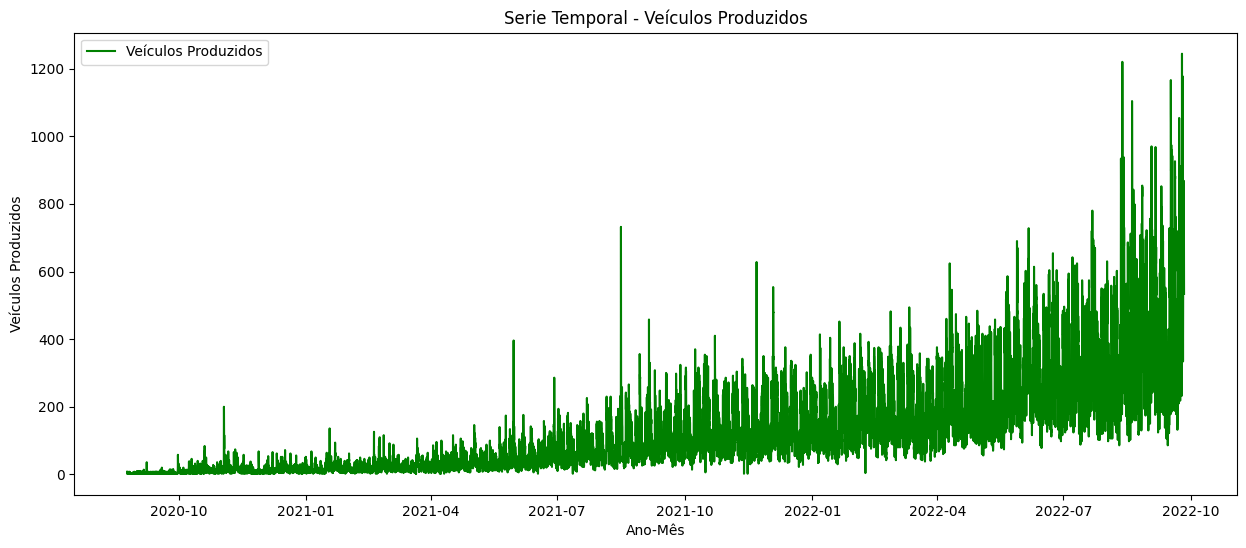

In [24]:
# Plot
figure(figsize = (15, 6))
plt.title("Serie Temporal - Veículos Produzidos")
plt.plot(target, label = "Veículos Produzidos", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Veículos Produzidos")
plt.legend(loc = "best")

Percebemos que há claramente uma tendência de aumento no número de veículos produzidos ao longo do tempo. 

### <font color=darkred> <b> Pré-Processamento dos Dados </b> </font>

Vamos agora dividir os dados de treino em duas amostras, **treino e validação**. Usamos os dados de treino para treinar o modelo e os dados de validação para validar a performance do modelo antes de usar dados de teste.

Observe que em Analise Estatisrica de ST os registros são separados em ordem cronológica, diferentemente o que fazemos com modelos de Machine Learning ( queremos os dados mais aleatórios possivel) que não consideram a data como indexador. Para esses modelos queremos a divisão dos dados de forma aleatória. Em séries temporais, queremos a **divisão em ordem cronológica**, já que o tempo é um elemento de informação dos dados.

In [25]:
dados_treino.head()

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


In [26]:
# Os dados de treino serão divididos em dados de treino e validação
# Para fazer a separação em ordem cronológica usamos o iloc[]para manter a sequencia
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

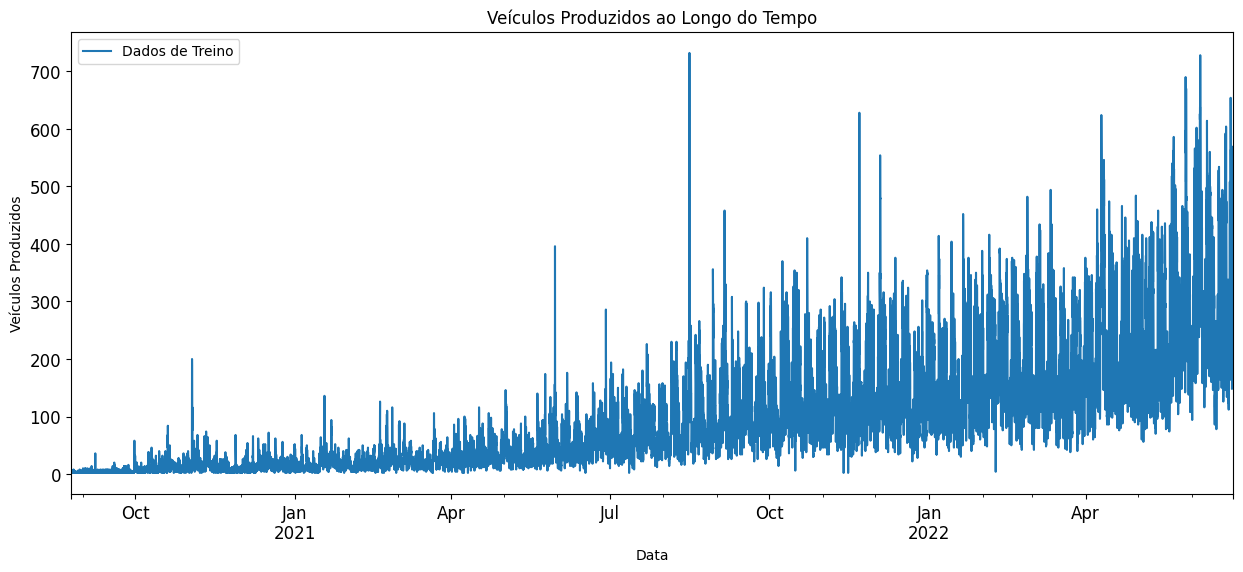

In [27]:
# Plot
# Dados de treino, df_treino
figure(figsize = (15, 6))
df_treino.veiculos_produzidos.plot(title = 'Veículos Produzidos ao Longo do Tempo', 
                                   fontsize = 12, 
                                   label = 'Dados de Treino') 
plt.xlabel("Data") 
plt.ylabel("Veículos Produzidos") 
plt.legend(loc = 'best') 
plt.show()

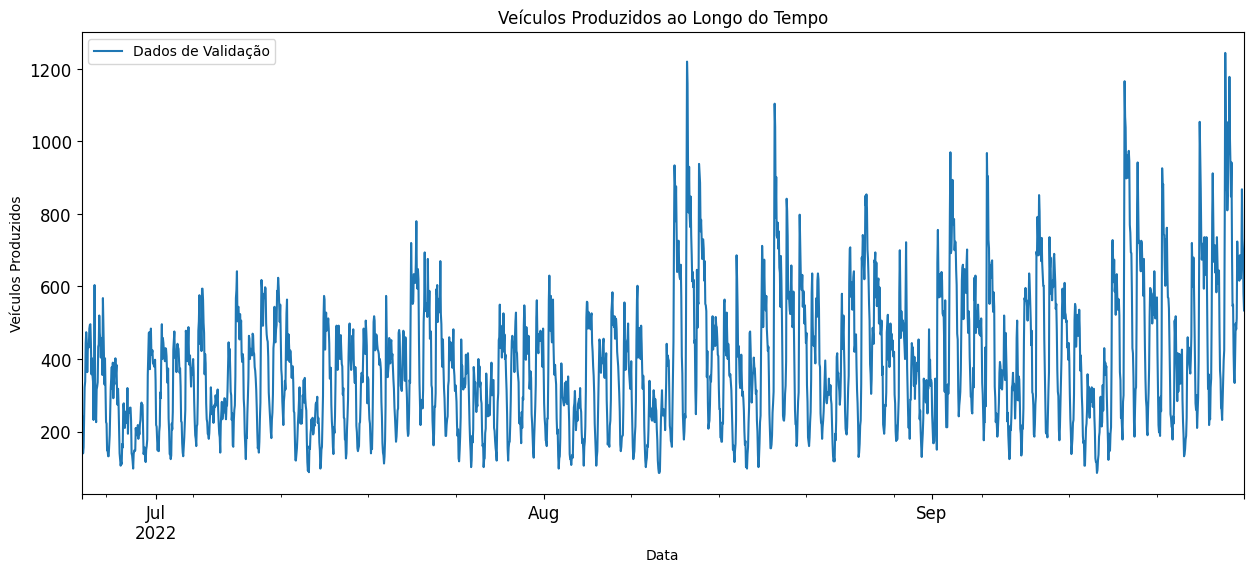

In [28]:
# Plot
# Dados de validação
figure(figsize = (15, 6))
df_valid.veiculos_produzidos.plot(title = 'Veículos Produzidos ao Longo do Tempo', 
                                  fontsize = 12, 
                                  label = 'Dados de Validação') 
plt.xlabel("Data") 
plt.ylabel("Veículos Produzidos") 
plt.legend(loc = 'best') 
plt.show()

In [29]:
# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [30]:
# Função que automatiza o teste de estacionaridade
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

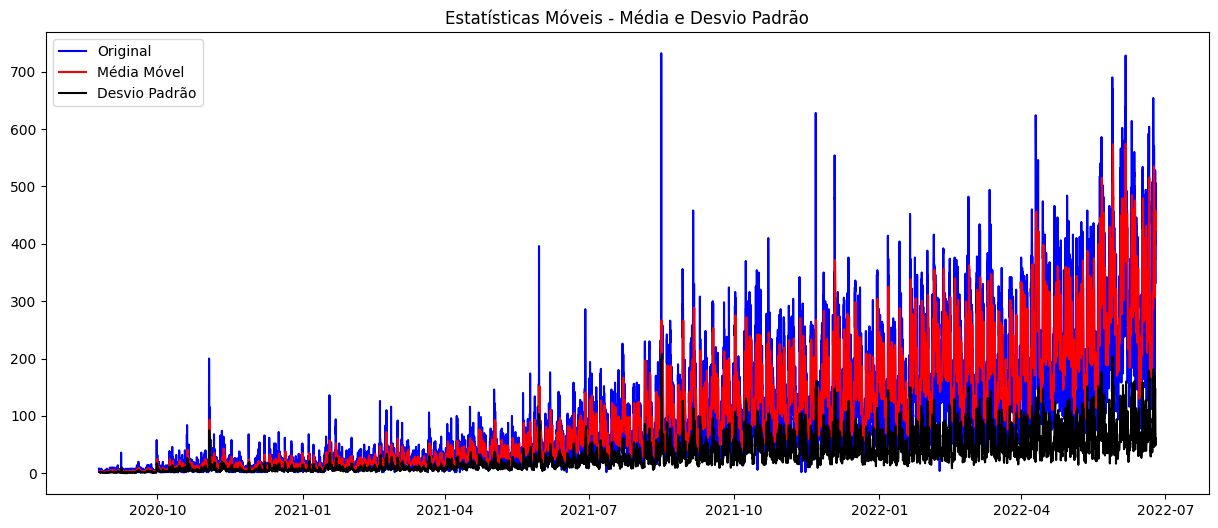


Resultado do Teste Dickey-Fuller:

Estatística do Teste               -5.038033
Valor-p                             0.000019
Número de Lags Consideradas        43.000000
Número de Observações Usadas    16013.000000
Valor Crítico (1%)                 -3.430758
Valor Crítico (5%)                 -2.861721
Valor Crítico (10%)                -2.566866
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [31]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
# Ver o Lab 1,que trabalha as tecnicas para tratar não estacionaridade
figure(figsize = (15, 6))
testa_estacionaridade(df_treino)

## <font color=darkred> <b> Forecasting - Modelagem Preditiva Para Séries Temporais </b> </font>

Criaremos alguns modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

A primeira versão será a mais simples possível, que usaremos como benchmark.

### <font color=darkgreen> <b> Implementando a Estratégia 1 de Forecasting - Método Naive </b> </color>

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [32]:
# Dataframe do Pandas
type(df_treino)

pandas.core.frame.DataFrame

In [33]:
df_treino.head()

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


In [34]:
df_treino.tail()

,veiculos_produzidos
data,
2022-06-24 20:00:00,444
2022-06-24 21:00:00,406
2022-06-24 22:00:00,352
2022-06-24 23:00:00,390
2022-06-25 00:00:00,332


In [35]:
# Criamos um array com os valores da variável target em treino e gravou na variavel array_veiculo_produzidos
# Array Numpy
array_veiculos_produzidos_treino = np.asarray(df_treino.veiculos_produzidos)

In [36]:
type(array_veiculos_produzidos_treino)

numpy.ndarray

In [37]:
# Os dados são os mesmos, mas agora temos uma outra estrutura para armazená-los - array
array_veiculos_produzidos_treino

array([  8,   2,   6, ..., 352, 390, 332], dtype=int64)

In [38]:
array_veiculos_produzidos_treino.shape

(16057,)

In [39]:
# Cria uma cópia dos dados de validação para usar na comparação dos dados reais com as previsões
df_valid_cp = df_valid.copy()

Veja como o método é mesmo Naive.

Os dados reais (de treino) são usados como previsão para os dados de validação, sem ajustá-los ou tentar estabelecer fatores causais

In [40]:
# nº de registros
len(array_veiculos_produzidos_treino)

16057

In [41]:
# Criando o modelo
# Pega o numero de registros - 1 - 
# Isto é a previsão Naive pega o ultimo valor da série temporal 332 no caso - ver no tail acima
# Previsão. Sim, isso é o Método Naive!
df_valid_cp['previsao_naive'] = array_veiculos_produzidos_treino[len(array_veiculos_produzidos_treino) - 1] 

In [42]:
# Colocamos lado a lado, valor real e valor "previsto"
# Que na previsão naive é o ultimo valor da série 332
# estamos em validação - testando o modelo
df_valid_cp[['veiculos_produzidos', 'previsao_naive']].head()

,veiculos_produzidos,previsao_naive
data,,
2022-06-25 02:00:00,218,332
2022-06-25 03:00:00,244,332
2022-06-25 04:00:00,168,332
2022-06-25 05:00:00,140,332
2022-06-25 06:00:00,156,332


In [43]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid_cp[['veiculos_produzidos', 'previsao_naive']].tail()

,veiculos_produzidos,previsao_naive
data,,
2022-09-25 19:00:00,868,332
2022-09-25 20:00:00,732,332
2022-09-25 21:00:00,702,332
2022-09-25 22:00:00,580,332
2022-09-25 23:00:00,534,332


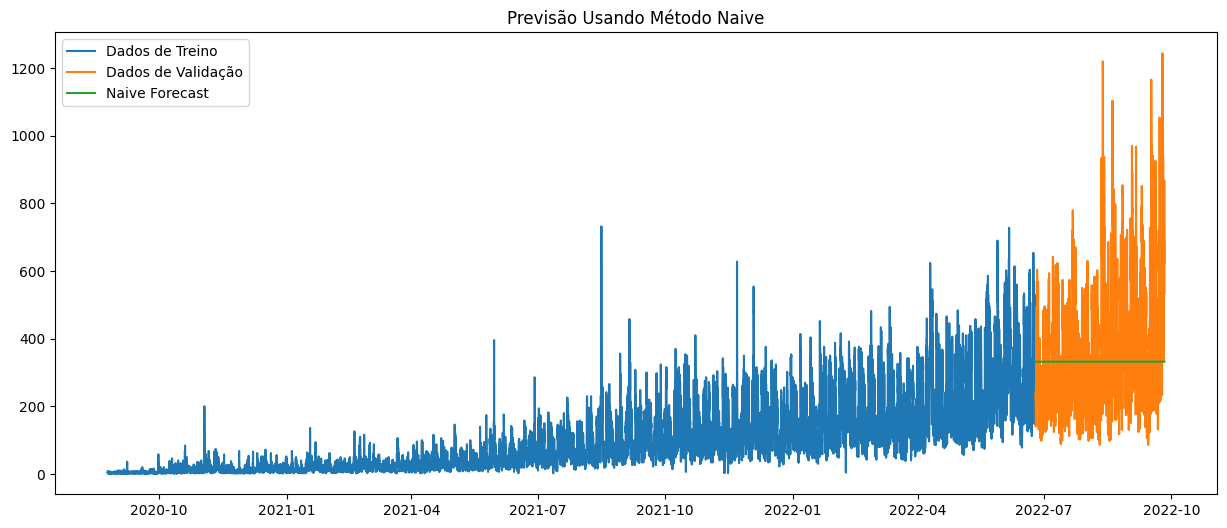

In [44]:
# Plot
figure(figsize = (15, 6))
plt.title("Previsão Usando Método Naive") 
plt.plot(df_treino.index, df_treino['veiculos_produzidos'], label = 'Dados de Treino') 
plt.plot(df_valid.index, df_valid['veiculos_produzidos'], label = 'Dados de Validação') 
plt.plot(df_valid_cp.index, df_valid_cp['previsao_naive'], label = 'Naive Forecast') 
plt.legend(loc = 'best') 
plt.show()

Observe que a linha amarela segue uma linha horizontal, sem considerar o padrão de comportamento da série ao longo do tempo. 

Ou seja, a previsão seria apenas um valor geral considerando o último valor dos dados de treino (dados históricos).

Esse é um método muito simples, mas que serve como ponto de partida. Qualquer técnica mais avançada deve apresentar uma performance melhor.

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo.

In [45]:
# Define valor real e valor previsto
y_true = df_valid_cp.veiculos_produzidos
y_pred = df_valid_cp.previsao_naive

In [46]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

195.06210118417584


RMSE (root mean squared error) é a taxa de erro e quanto menor, melhor!
Diferença entre o valor real - valor previsto ao quadrado
Esse é o metodo mais simples que servirá como benchmark, mas tentar tecnicas para diminuir o erro de 195, dado pelo modelo Naive

## <font color=darkgreen> <b> Implementando a Estratégia 2 de Forecasting - Exponential Smoothing </b> </color>

Exponential Smoothing é uma técnica de modelagem de séries temporais que utiliza uma média móvel ponderada para prever valores futuros de uma série temporal. Cada ponto de dado é atribuído com um peso exponencial decrescente, com os pontos mais recentes recebendo mais peso e os pontos mais antigos recebendo menos peso. O resultado é uma previsão suavizada que leva em consideração tanto a tendência geral quanto a sazonalidade da série temporal.

Vamos carregar e trabalhar os dados novamente, para as estratégias ficarem independentes

### <font color=darkred> <b> Carregando e preparando os Dados </b> </font>

In [47]:
# Carrega os dados
dados_treino = pd.read_csv("dados/dataset_treino.csv")
dados_teste = pd.read_csv("dados/dataset_teste.csv")

In [48]:
# Converte a coluna de data para o tipo correto
dados_treino['data'] = pd.to_datetime(dados_treino.data, format = '%d-%m-%Y %H:%M')

In [49]:
# Converte a coluna de data para o tipo correto
dados_teste['data'] = pd.to_datetime(dados_teste.data, format = '%d-%m-%Y %H:%M')

In [50]:
# Definimos o índice do dataset
dados_treino.index = dados_treino['data']

In [51]:
# Removemos a coluna ID, pois ela não é relevante neste caso
dados_treino.drop('id', axis = 1, inplace = True)

In [52]:
# Removemos a coluna data, pois ela não é relevante neste caso
dados_treino.drop('data', axis = 1, inplace = True)

In [53]:
# Variável target 
target = dados_treino['veiculos_produzidos']

In [54]:
# Vejamos como ficou o dataset
dados_treino.head()

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


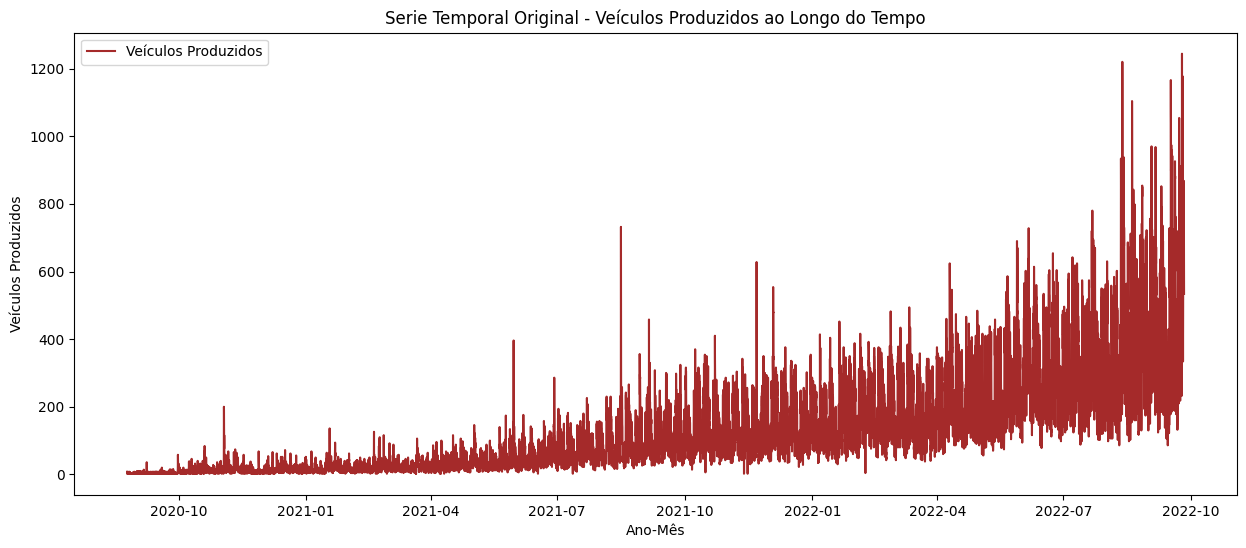

In [55]:
# Plot
figure(figsize = (15, 6))
plt.title("Serie Temporal Original - Veículos Produzidos ao Longo do Tempo")
plt.plot(target, label = "Veículos Produzidos", color = 'brown')
plt.xlabel("Ano-Mês")
plt.ylabel("Veículos Produzidos")
plt.legend(loc = "best")

### <font color=darkred> <b> Pré-Processamento dos Dados </b> </font>

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

Observe que os registros são separados em ordem cronológica.

In [56]:
# Como já sabemos que a serie é estacionária, vamos partir direto para a divisão dos dados
# Os dados de treino serão divididos em dados de treino e validação.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

In [57]:
# Os dados devem estar no formato NumPy para o treino do modelo
array_dados_treino = np.asarray(df_treino['veiculos_produzidos'])

In [58]:
type(array_dados_treino)

numpy.ndarray

### <font color=darkred> <b> Implementando o Modelo</b> </font>

#### Simple Exponential Smoothing - Vamos criar dois modelos de Suavização Exponencial usando o Statsmodels.


Simple Exponential Smoothing é uma versão simples e popular de Exponential Smoothing que usa apenas um parâmetro ajustável para controlar a influência dos dados passados na previsão. 

Neste modelo, a previsão para o próximo período é dada pela combinação de uma média móvel ponderada dos valores passados com a última previsão. 

O peso atribuído a cada ponto de dado é determinado pelo parâmetro ajustável, que pode ser otimizado usando técnicas como otimização por mínimos quadrados. 

O Simple Exponential Smoothing é fácil de implementar e pode ser usado com sucesso em muitos tipos de séries temporais, mas pode ser insuficiente para lidar com séries temporais com tendências complexas ou sazonalidades fortes.

In [59]:
# Versão 1 do modelo - Simple Exponential Smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

# A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy
# A função fit() faz o treinamento

# O hiperparâmetro smoothing_level define o nível de suavização exponencial na série
# O hiperparâmetro optimized define se teremos ou não otimização 

# Versão 1 do modelo - Simple Exponential Smoothing 
# a fç espera receber um array Numpy, por isso convertemos acima
modelo_v1 = SimpleExpSmoothing(array_dados_treino).fit(smoothing_level = 0.2, optimized = True)

In [60]:
# Previsões com o Modelo
df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid)) 

In [61]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid[['veiculos_produzidos', 'previsoes_v1']].head()

,veiculos_produzidos,previsoes_v1
data,,
2022-06-25 02:00:00,218,395.388938
2022-06-25 03:00:00,244,395.388938
2022-06-25 04:00:00,168,395.388938
2022-06-25 05:00:00,140,395.388938
2022-06-25 06:00:00,156,395.388938


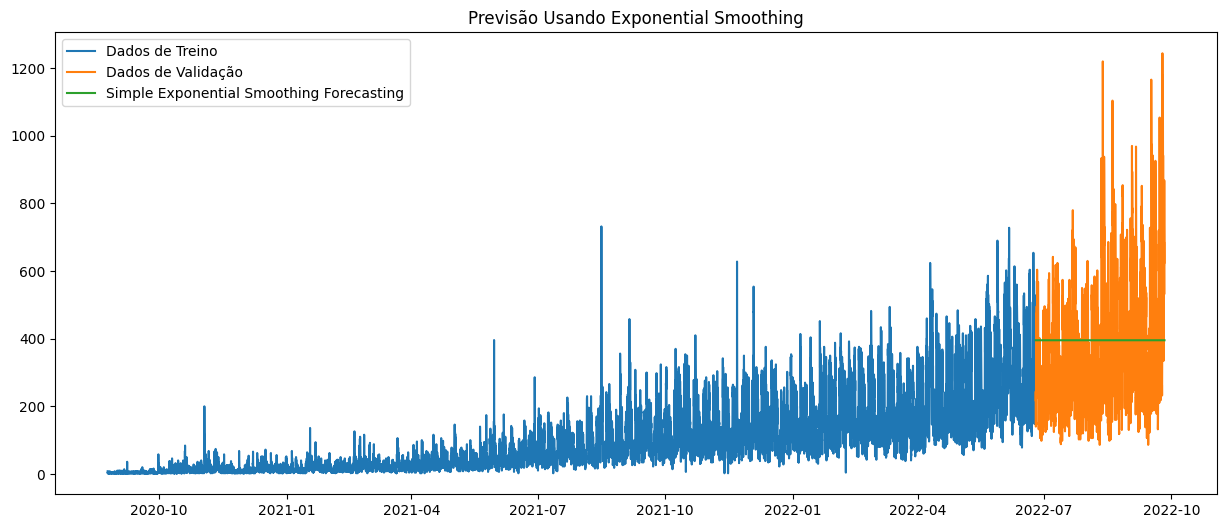

In [62]:
# Plot
figure(figsize = (15, 6))
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['veiculos_produzidos'], label = 'Dados de Treino')
plt.plot(df_valid['veiculos_produzidos'], label = 'Dados de Validação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

In [63]:
# Define valor real e valor previsto
y_true = df_valid.veiculos_produzidos
y_pred = df_valid.previsoes_v1

In [64]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

186.52867297329848


Nosso modelo base com o Método Naive obteve um RMSE de 195.06. Reduzimos o erro para 186.53. Ou seja, já temos uma forma de fazer previsões um pouco melhores.

Podemos usar o Simple Exponencial Smoothing como benchmark, no lugar do metodo Naive que não faz previsão, 
apenas repete o valor anterior

Nosso objetivo é reduzir o RMSE tanto quanto possível, pois essa métrica indica a taxa de erro do modelo.

Será que conseguimos melhorar a performance do modelo preditivo? Vamos tentar outro tipo de suavização exponencial.

#### Double Exponential Smoothing 

Double Exponential Smoothing é uma técnica de modelagem de séries temporais que **combina elementos de Simple Exponential Smoothing com uma previsão da tendência da série temporal**. 

Além do parâmetro ajustável que controla a influência dos dados passados na previsão, o Double Exponential Smoothing também inclui um segundo parâmetro ajustável que controla a influência da tendência na previsão. A previsão para o próximo período é dada pela combinação da última previsão, da última tendência estimada e da última observação. 

- O Double Exponential Smoothing é mais robusto do que o Simple Exponential Smoothing e é capaz de lidar com séries temporais com tendências complexas ou sazonalidades fortes.

In [65]:
# Versão 2 do modelo - Double Exponential Smoothing 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

# Observe que estamos usando a função ExponentialSmoothing().
# Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.
# Ao usar o hiperparâmetro seasonal, definimos o método Triple Exponential Smoothing.

# Vamos usar o Double. Como não temos sazonalidade na série, não faz muito sentido usar o Triple.
# Escolhi a série aditiva

# Nesse comando, já converte ao mesmo tempo para array Numpy, que é o formato que o  modelo quer receber
# Pegou a df_treino na coluna veiculos_produzidos e já converteu direto

modelo_v2 = ExponentialSmoothing(np.asarray(df_treino['veiculos_produzidos']), 
                                 trend = 'additive').fit(smoothing_level = 0.9, 
                                                         optimized = True) 

In [66]:
# Previsões com o Modelo
df_valid.loc[:,'previsoes_v2'] = modelo_v2.forecast(len(df_valid))

In [67]:
# Colocamos lado a lado, valor real e valor "previsto" com simple e double smoothing
df_valid[['veiculos_produzidos', 'previsoes_v1', 'previsoes_v2']].head()

,veiculos_produzidos,previsoes_v1,previsoes_v2
data,,,
2022-06-25 02:00:00,218,395.388938,337.596236
2022-06-25 03:00:00,244,395.388938,337.681882
2022-06-25 04:00:00,168,395.388938,337.767528
2022-06-25 05:00:00,140,395.388938,337.853174
2022-06-25 06:00:00,156,395.388938,337.938820


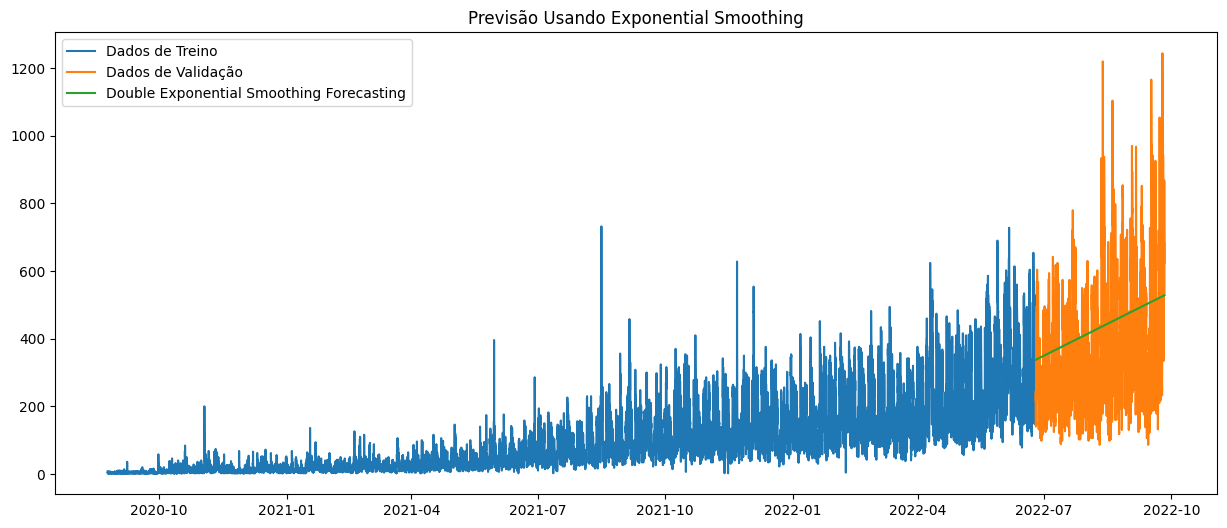

In [68]:
# Plot
figure(figsize = (15, 6))
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['veiculos_produzidos'], label = 'Dados de Treino')
plt.plot(df_valid['veiculos_produzidos'], label = 'Dados de Validação')
plt.plot(df_valid['previsoes_v2'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

In [69]:
# Define valor real e valor previsto
y_true = df_valid.veiculos_produzidos
y_pred = df_valid.previsoes_v2

In [70]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

182.55380116320066


Conseguimos um ganho um pouco mais efetivo. A linha de previsão mudou (verde), seguindo um pouco mais o padrão nos dados, e o erro do modelo caiu um pouco mais.

Ainda assim as técnicas de suavização apresentaram um resultado apenas levemente superior ao modelo base. Vamos tentar melhorar isso com modelos ARIMA.

Não usamos ainda os dados de teste. Usaremos com a melhor versão do modelo.

### :-) Fim
